# Resolutions

In [44]:
%reset -f

import ROOT

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetGridColor(16)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)
ROOT.gStyle.SetPadRightMargin(0)
ROOT.gStyle.SetPadBottomMargin(0.12)
ROOT.gStyle.SetPadLeftMargin(0.07)
ROOT.gStyle.SetTitleOffset(0.7, 'Y')
ROOT.gStyle.SetTitleSize(0.06,'T')
ROOT.gStyle.SetTitleSize(0.05,'xy')
ROOT.gStyle.SetLabelSize(0.043,'xy')

ROOT.TH1.AddDirectory(0)

%run -i eppi0_columns.py
%run -i eppi0_binning_scheme_v3.py
%run -i eppi0_genvals.py

rdfs = []
for fname in ['data/lvl2_eppi0.inb.qa.ecorr.pcorr.root','data/lvl2_eppi0.inb.mc.smear.eloss.root','data/lvl2_eppi0.outb.qa.ecorr.pcorr.root','data/lvl2_eppi0.outb.mc.smear.eloss.root']:
    df = ROOT.RDataFrame("h22", fname)
    df = define_eppi0_columns_using_proton(df)
    if 'mc' in fname:
        df = df.Define("ihel","1")
        df = define_true_eppi0_columns(df)
        df = df.Define("dmt", "mt0-tt")
    df = define_eppi0_bins(df, fname)
    df = process_eppi0_bins(df, fname)
    df = df.Filter("abs(dpt)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9")
    #df = df.Filter("abs(dpx)<0.3 && abs(dpy)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9 && mm2>-0.3 && mm2<0.4")
    df = df.Filter("&&".join(f"(((int)status)&(1<<{i}))" for i in [gloosest,prodc]))
    df = df.Filter("thp<44.106+-6.625*pp+1.438*pp*pp")
    df = df.Define("pg", "array<double,2>{pg1,pg2}")
    df = df.Define("thg", "array<double,2>{thg1,thg2}")
    df = df.Define("fig", "array<double,2>{fig1,fig2}")
    rdfs.append(df)

In [45]:
hmm2s = [df.Histo1D(("hmm2","MM^{2}_{epX};MM^{2} [GeV^{2}]",200,-1,1.5), "mm2") for df in rdfs]
hmggs = [df.Filter("mm2>-0.3 && mm2<0.4").Histo1D(("hmgg","M_{#gamma#gamma};M_{#gamma#gamma} [GeV]",200,0,0.25), "mgg") for df in rdfs]

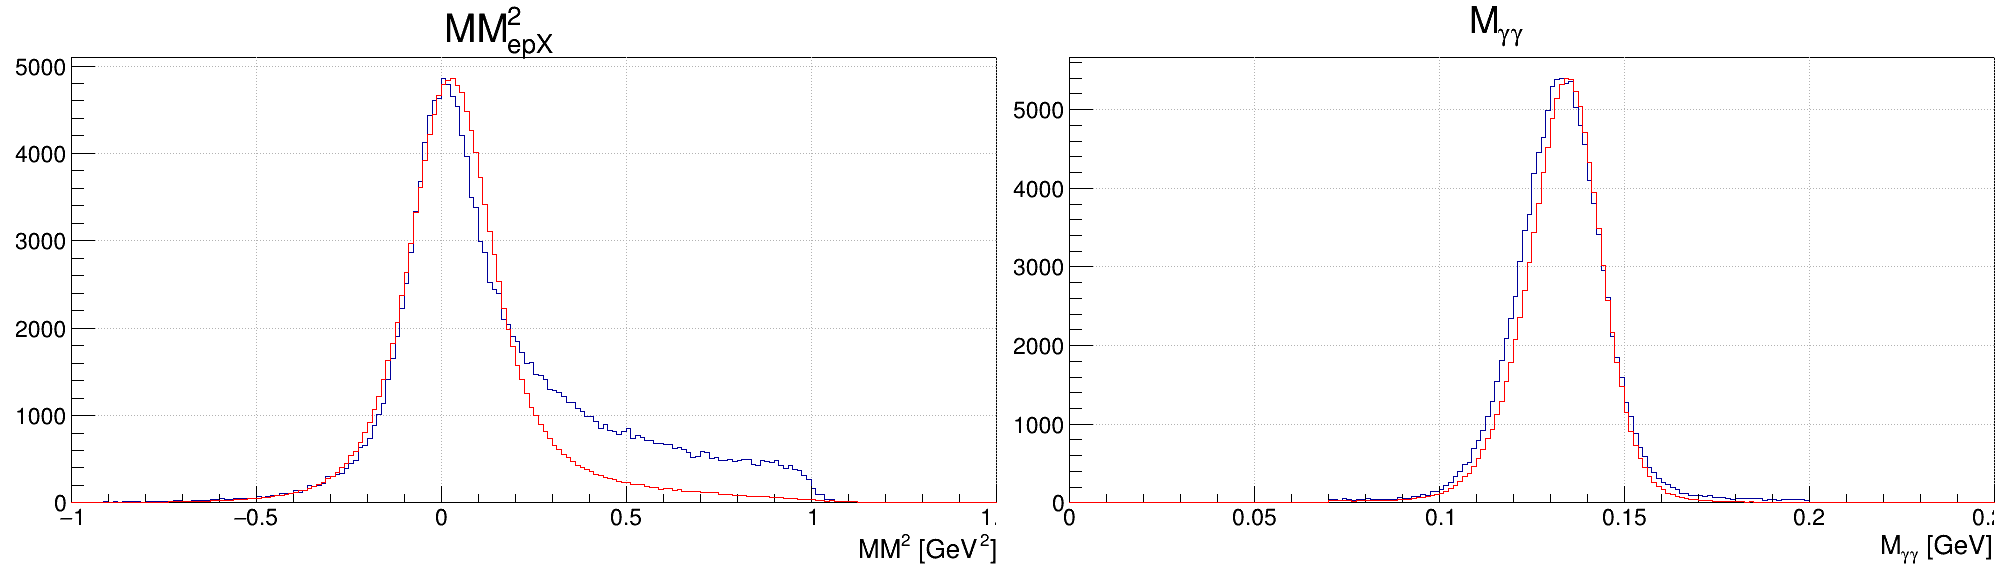

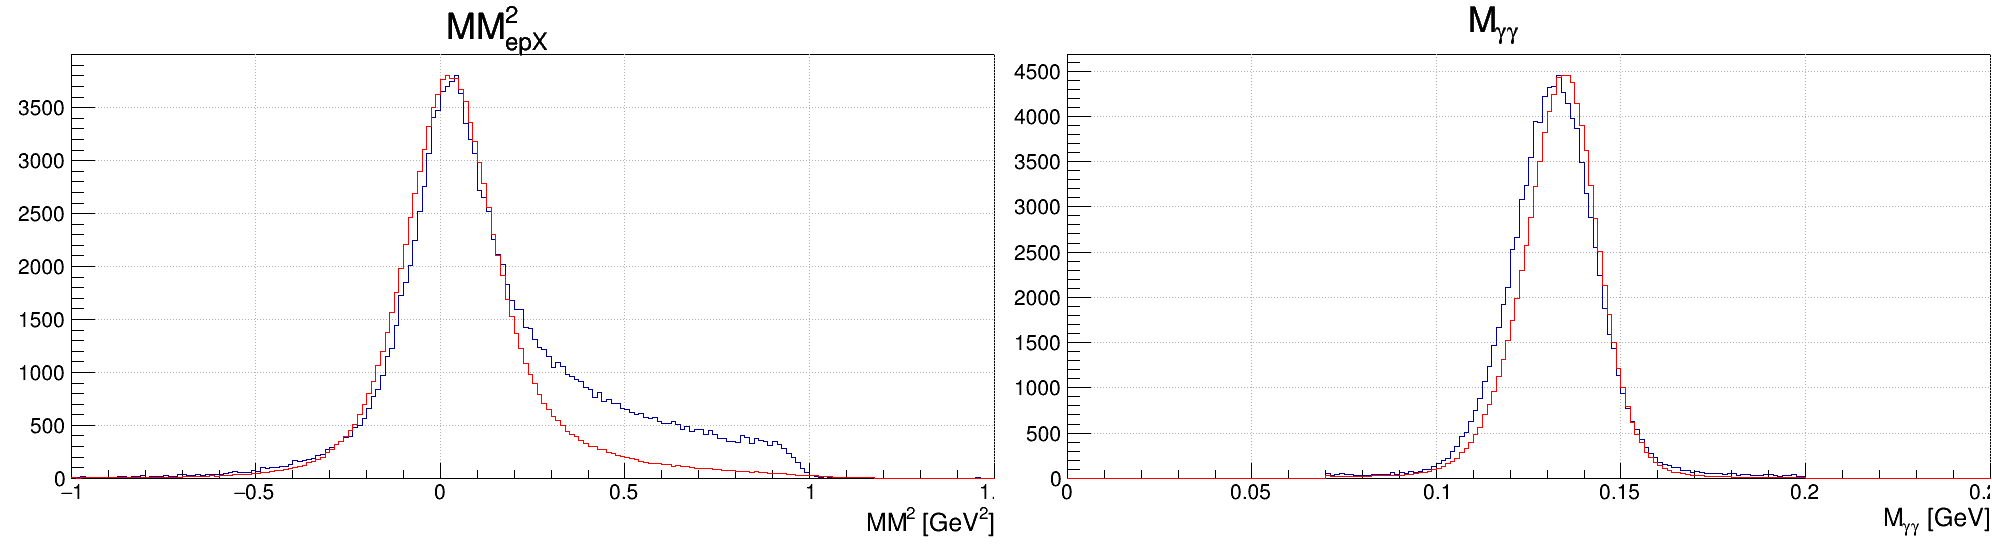

In [46]:
c1 = ROOT.TCanvas("c1","c1",2000,600)
c1.SetTopMargin(0)
c1.SetRightMargin(0)
c1.Divide(2,1,0.001,0.001)

c1.Draw()

ipad = 0
for h1,h2 in [hmm2s[:2], hmggs[:2]]:
    ipad+=1
    c1.cd(ipad)
    h1.Draw()
    h2 = h1.mc = h2.Clone()
    scale = h2.GetMaximum()/h1.GetMaximum()
    h2.Scale(1/scale)
    h2.Draw("same hist")
    h2.SetLineColor(2)

c1.Print("pdf/MC_comparison.resolutions.inb.pdf")
#_____________________________________________________________________________________

c2 = c1.DrawClone()

ipad = 0
for h1,h2 in [hmm2s[2:], hmggs[2:]]:
    ipad+=1
    c2.cd(ipad)
    h1.Draw()
    h2 = h1.mc = h2.Clone()
    scale = h2.GetMaximum()/h1.GetMaximum()
    h2.Scale(1/scale)
    h2.Draw("same hist")
    h2.SetLineColor(2)

c1.Print("pdf/MC_comparison.resolutions.outb.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


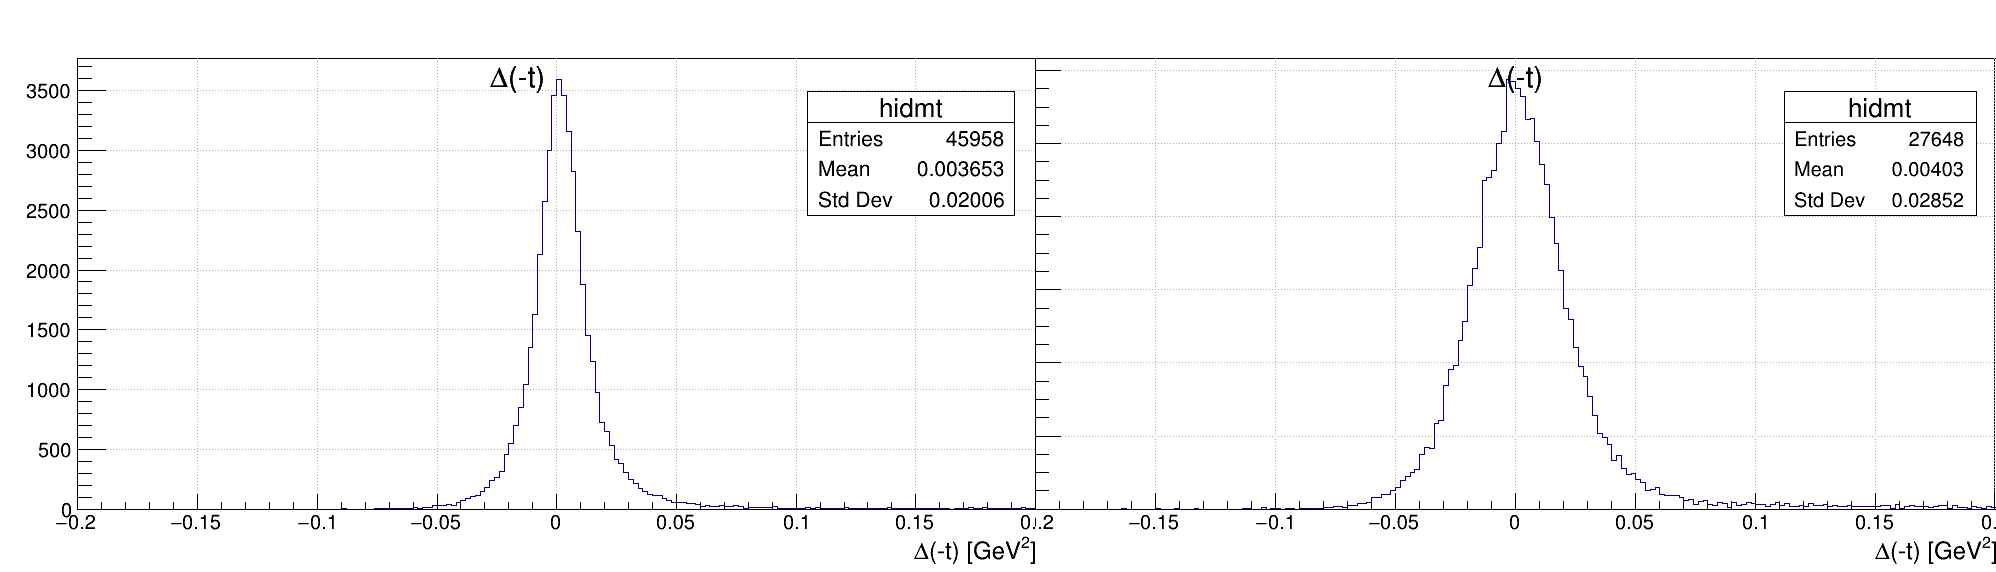

In [53]:
idf,imc,odf,omc = rdfs

ROOT.gStyle.SetOptStat(1)

cut = "iqx==4 && itt==0"

hidmt = imc.Filter(cut).Histo1D(("hidmt","#Delta(-t);#Delta(-t) [GeV^{2}];",200,-0.2,0.2), "dmt")
hodmt = omc.Filter(cut).Histo1D(("hidmt","#Delta(-t);#Delta(-t) [GeV^{2}];",200,-0.2,0.2), "dmt")
c1 = ROOT.TCanvas("c1","c1",2000,600)
c1.Divide(2,1,0,0)
c1.Draw()
c1.cd(1)
hidmt.Draw()
c1.cd(2)
hodmt.Draw()

________________________________
________________________________
________________________________